# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from math import tan
from pprint import pprint
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import interpolate
import bisect

eps = sys.float_info.epsilon

# Initialization

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)

# Functions

In [ ]:
def rk4(f, p, h, xn):
  '''Runge Kutta 4th order'''
  x = p[0]
  y = p[1]
  z = p[2]
  x_values = []
  y_values = []
  z_values = []
  while x < xn:
    k1 = [h * fn(x, y, z) for fn in f]
    k2 = [h * fn(x + h/2, y + k1[0]/2, z + k1[1]/2) for fn in f]
    k3 = [h * fn(x + h/2, y + k2[0]/2, z + k2[1]/2) for fn in f]
    k4 = [h * fn(x + h, y + k3[0], z + k3[1]) for fn in f]
    z += (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
    y += (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
    x_values.append(x)
    y_values.append(y)
    z_values.append(z)
    x += h
  return x_values, y_values, z_values

# z(x,y,y') = y'
def f1(x, y, y1):
  return y1

# z' = 2 * tg(x) * z
def f2(x, y, z):
  return 2 * tan(x) * z

def shooting(eps=1e-13):
  h = 0.01
  xn = 1

  x0 = 0
  A = 0
  x1 = 1
  B = tan(1)

  alpha1 = 0
  alpha2 = 90
  alpha = 0

  count = 0
  while abs(alpha2 - alpha1) > eps:
    count += 1
    alpha = .5 * (alpha1 + alpha2)
    x1, y1, z1 = rk4([f1, f2], [x0, A, tan(alpha1)], h, xn)
    x2, y2, z2 = rk4([f1, f2], [x0, A, tan(alpha)], h, xn)
    if (y1[-1] - B) * (y2[-1] - B) < 0:
      alpha2 = alpha
    else:
      alpha1 = alpha

  x, y, z = rk4([f1, f2], [x0, A, tan(alpha)], h, xn)
  print(f'eps: {eps}, shots quantity: {count}')
  return x, y, z



# Task

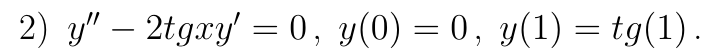

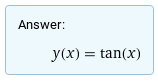

eps: 1, shots quantity: 7
eps: 0.5, shots quantity: 8
eps: 1e-10, shots quantity: 40


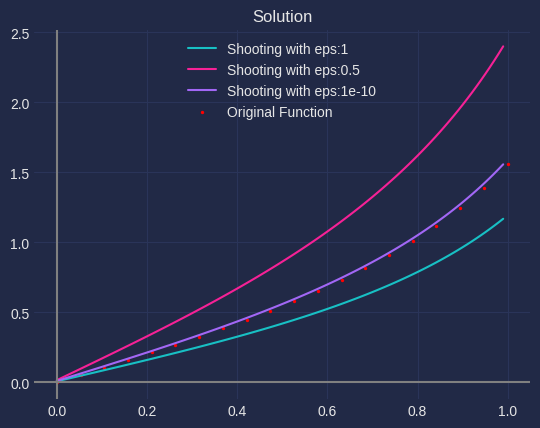

In [ ]:
xorig = np.linspace(0, 1, 20)
yorig = [tan(i) for i in xorig]
fig, ax = plt.subplots()

my_eps = 1
x, y, z = shooting(my_eps)
plt.plot(x, y, label=f'Shooting with eps:{my_eps}')

my_eps = .5
x, y, z = shooting(my_eps)
plt.plot(x, y, label=f'Shooting with eps:{my_eps}')

my_eps = 1e-10
x, y, z = shooting(my_eps)
plt.plot(x, y, label=f'Shooting with eps:{my_eps}')

ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.grid(True)
ax.set_title('Solution')
plt.scatter(xorig, yorig, s=2, color='red', label='Original Function')
ax.legend()